# Customer Churn Analysis Project

## Business Problem
Customer churn directly impacts company revenue.  
The objective of this project is to:

- Identify churn rate
- Analyze churn drivers
- Discover high-risk customer segments
- Provide business recommendations


In [78]:
# Import Libraries

import pandas as pd 
import numpy as py 
import matplotlib.pyplot as plt 
import seaborn as sns

In [79]:
# Load dataset

df= pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
# Basic data exploration

df.info() 
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [81]:
# Convert TotalCharges to numeric and drop nan values

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace = True)

## Exploratory Data Analysis (EDA)


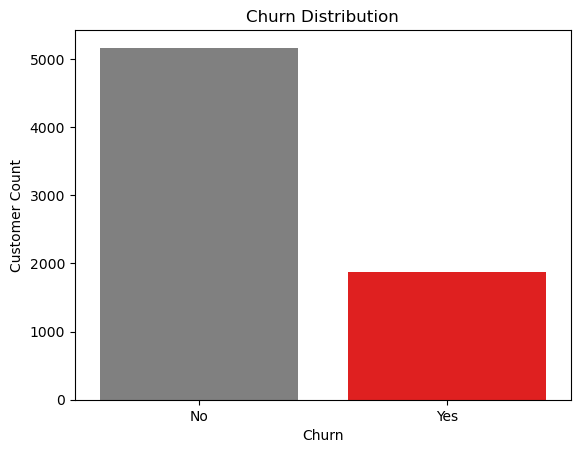

In [86]:
# Churn distribution(EDA analysis)

sns.countplot(x='Churn',
              hue = 'Churn', 
              data = df, 
              palette = ['grey' ,'red'])
plt.title('Churn Distribution')
plt.ylabel('Customer Count')
plt.xlabel('Churn')
plt.show()

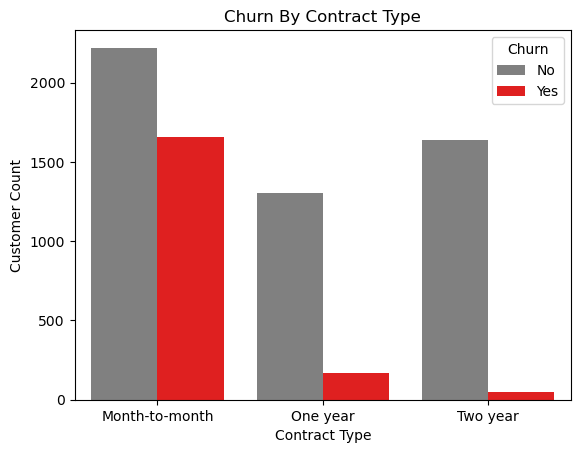

In [91]:
# Churn by contract type (using countplot)

sns.countplot(x = 'Contract', 
              hue = 'Churn', 
              data = df,
              palette = ['grey' , 'red'])
plt.title('Churn By Contract Type')
plt.ylabel('Customer Count')
plt.xlabel('Contract Type')
plt.show()

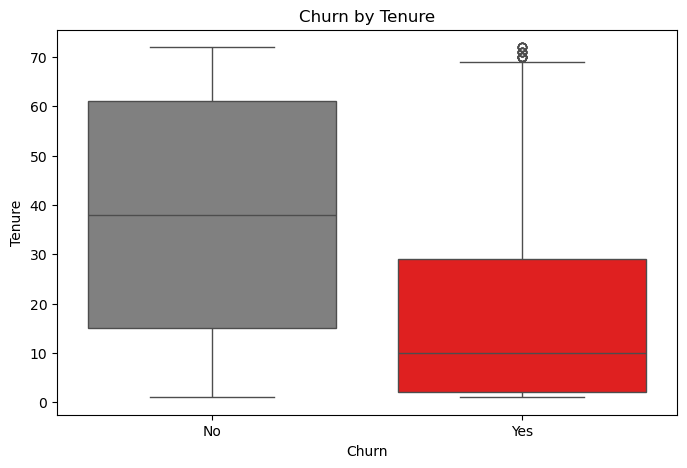

In [100]:
# Churn by tenure (using boxplot)

plt.figure(figsize = (8,5))
sns.boxplot(hue ='Churn',
            x='Churn', 
            y = 'tenure', 
            data = df,
            palette= ['grey','red'])
plt.title('Churn by Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

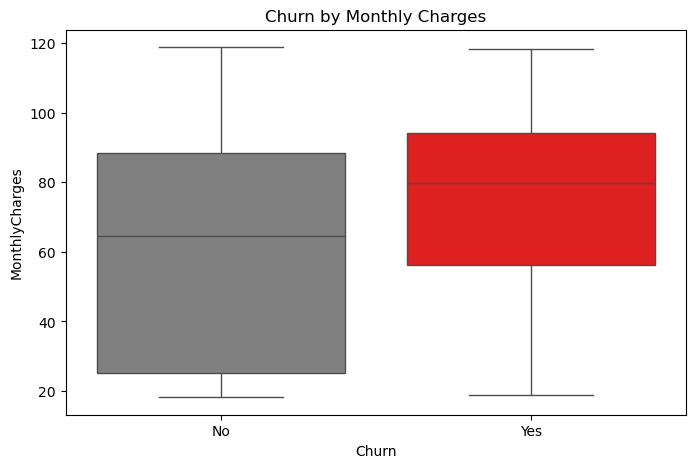

In [105]:
# Churn by monthly charges (using boxplot )

plt.figure(figsize=(8,5))
sns.boxplot( hue = 'Churn', 
            x = 'Churn', 
            y = 'MonthlyCharges', 
            data =df, 
            palette = ['grey', 'red'])
plt.title('Churn by Monthly Charges')
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')
plt.show()

In [107]:
# Create Tenure Group 

df['TenureGroup'] = pd.cut(df['tenure'],
                           bins = [0,12,24,48,60,100],
                           labels=['0-12','12-24','24-48','48-60','60+'])

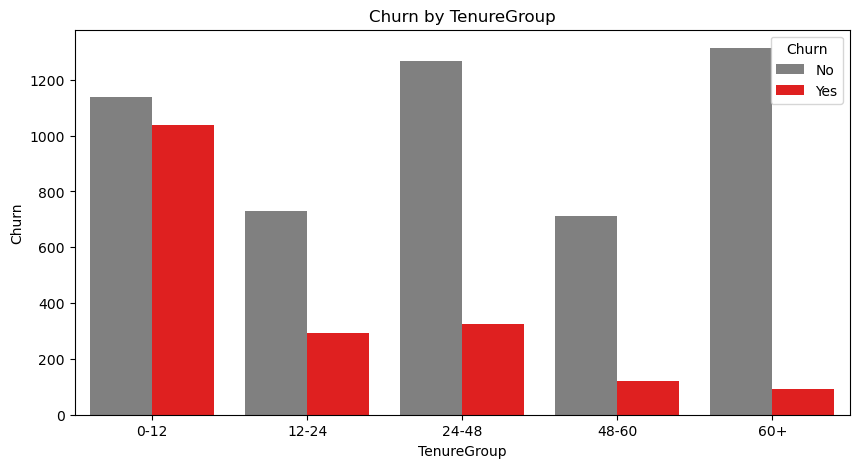

In [114]:
# Churn by Tenure Group(using countplot)

plt.figure(figsize=(10,5))
sns.countplot(x='TenureGroup', 
              hue= 'Churn', 
              data = df, 
              palette = ['grey', 'red'])
plt.title('Churn by TenureGroup')
plt.xlabel('TenureGroup')
plt.ylabel('Churn')
plt.show()

## Key Insights


### Observations:

- Month-to-month contract customers show highest churn.
- Customers with low tenure (0-12 months) churn more.
- High monthly charges are linked with higher churn.
- Long-term contract customers show higher retention.


## Business Recommendations

- Promote long-term contracts with discounts.
- Provide loyalty offers for customers completing 1 year.
- Improve onboarding experience for new customers.
- Offer retention plans for high monthly charge users.
